In [3]:
import h2o
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,50 mins 26 secs
H2O cluster timezone:,Europe/Paris
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,1 month and 3 days
H2O cluster name:,H2O_from_python_a_nogue_sanchez_ggdkit
H2O cluster total nodes:,1
H2O cluster free memory:,3.282 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [5]:
data = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
train, valid, test = data.split_frame([0.8,0.1], seed = 69)

In [7]:
print("%d/%d/%d" %(train.nrows, valid.nrows, test.nrows))

35255/4272/4451


In [8]:
y = 'IsArrDelayed'
ignoreFields = [
    "ArrDelay", "DepDelay",
    "CarrierDelay", "WeatherDelay",
    "NASDelay", "SecurityDelay",
    "LateAircraftDelay",
    "IsDepDelayed", "IsArrDelayed",
    "ActualElapsedTime",
    "ArrTime"
]
xAll = [i for i in train.names if i not in ignoreFields]
xLikely = ['Month', 'DayOfWeek', 'UniqueCarrier', 
          'Origin', 'Dest', 'Distance',
          'Cancelled', 'Diverted']

In [9]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [12]:
m_def = H2ODeepLearningEstimator()
%time m_def.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 4min 36s


In [14]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.14498435564407547
RMSE: 0.38076811269337596
LogLoss: 0.4363571365832446
Mean Per-Class Error: 0.21015234931668358
AUC: 0.8829063246496274
pr_auc: 0.8204353576088218
Gini: 0.7658126492992547
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2815928812313799: 


,NO,YES,Error,Rate
NO,1170.0,780.0,0.4,(780.0/1950.0)
YES,195.0,2306.0,0.078,(195.0/2501.0)
Total,1365.0,3086.0,0.2191,(975.0/4451.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2815929,0.8254877,282.0
max f2,0.1750317,0.8971886,322.0
max f0point5,0.5499223,0.8334154,171.0
max accuracy,0.3825036,0.7906089,244.0
max precision,0.9998998,1.0,0.0
max recall,0.0212530,1.0,391.0
max specificity,0.9998998,1.0,0.0
max absolute_mcc,0.5012785,0.5756037,194.0
max min_per_class_accuracy,0.4544709,0.7871795,213.0
max mean_per_class_accuracy,0.5012785,0.7898477,194.0


Gains/Lift Table: Avg response rate: 56,19 %, avg score: 49,40 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101101,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0179928,0.0179928,77.9688125,77.9688125
,2,0.0202202,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0179928,0.0359856,77.9688125,77.9688125
,3,0.0301056,0.9999935,1.7796881,1.7796881,1.0,0.9999986,1.0,0.9999995,0.0175930,0.0535786,77.9688125,77.9688125
,4,0.0402157,0.9998451,1.7796881,1.7796881,1.0,0.9999508,1.0,0.9999873,0.0179928,0.0715714,77.9688125,77.9688125
,5,0.0501011,0.9992253,1.7796881,1.7796881,1.0,0.9996354,1.0,0.9999179,0.0175930,0.0891643,77.9688125,77.9688125
,6,0.1002022,0.9746984,1.7796881,1.7796881,1.0,0.9909709,1.0,0.9954444,0.0891643,0.1783287,77.9688125,77.9688125
,7,0.1500786,0.8981653,1.7716715,1.7770239,0.9954955,0.9385165,0.9985030,0.9765252,0.0883647,0.2666933,77.1671512,77.7023921
,8,0.2001797,0.8265746,1.6440168,1.7437348,0.9237668,0.8602754,0.9797980,0.9474302,0.0823671,0.3490604,64.4016833,74.3734829
,9,0.3001573,0.6942182,1.5797232,1.6891052,0.8876404,0.7605298,0.9491018,0.8851767,0.1579368,0.5069972,57.9723167,68.9105196
,10,0.4001348,0.5807214,1.3237680,1.5978222,0.7438202,0.6331886,0.8978102,0.8222150,0.1323471,0.6393443,32.3768021,59.7822185


In [15]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1556831140904_1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.13256085087189848
RMSE: 0.36408906997038304
LogLoss: 0.40455148433881083
Mean Per-Class Error: 0.18995007013028908
AUC: 0.9016281007060493
pr_auc: 0.8312228932807557
Gini: 0.8032562014120985
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3551814821494867: 


,NO,YES,Error,Rate
NO,3184.0,1351.0,0.2979,(1351.0/4535.0)
YES,624.0,4858.0,0.1138,(624.0/5482.0)
Total,3808.0,6209.0,0.1972,(1975.0/10017.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3551815,0.8310666,255.0
max f2,0.1450703,0.9005619,335.0
max f0point5,0.5777197,0.8484236,168.0
max accuracy,0.4131421,0.8078267,233.0
max precision,0.9998868,1.0,0.0
max recall,0.0257331,1.0,389.0
max specificity,0.9998868,1.0,0.0
max absolute_mcc,0.5045467,0.6176340,197.0
max min_per_class_accuracy,0.4576487,0.8055127,216.0
max mean_per_class_accuracy,0.5023236,0.8100499,198.0


Gains/Lift Table: Avg response rate: 54,73 %, avg score: 49,36 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100829,1.0000000,1.8272528,1.8272528,1.0,1.0000000,1.0,1.0000000,0.0184239,0.0184239,82.7252827,82.7252827
,2,0.0200659,1.0000000,1.8272528,1.8272528,1.0,1.0000000,1.0,1.0000000,0.0182415,0.0366655,82.7252827,82.7252827
,3,0.0300489,0.9999843,1.8272528,1.8272528,1.0,0.9999972,1.0,0.9999991,0.0182415,0.0549070,82.7252827,82.7252827
,4,0.0400319,0.9998164,1.8272528,1.8272528,1.0,0.9999220,1.0,0.9999799,0.0182415,0.0731485,82.7252827,82.7252827
,5,0.0500150,0.9989914,1.8272528,1.8272528,1.0,0.9995124,1.0,0.9998865,0.0182415,0.0913900,82.7252827,82.7252827
,6,0.1000299,0.9751255,1.8272528,1.8272528,1.0,0.9899887,1.0,0.9949376,0.0913900,0.1827800,82.7252827,82.7252827
,7,0.1500449,0.9144203,1.8199584,1.8248214,0.9960080,0.9453541,0.9986693,0.9784098,0.0910252,0.2738052,81.9958405,82.4821353
,8,0.2000599,0.8371769,1.7543086,1.8071932,0.9600798,0.8751392,0.9890220,0.9525921,0.0877417,0.3615469,75.4308603,80.7193166
,9,0.2999900,0.7113482,1.6574881,1.7573247,0.9070929,0.7736185,0.9617304,0.8929740,0.1656330,0.5271799,65.7488079,75.7324683
,10,0.4000200,0.5826987,1.3841167,1.6639994,0.7574850,0.6434506,0.9106564,0.8305776,0.1384531,0.6656330,38.4116663,66.3999393




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.14475755358728454
RMSE: 0.38047017437282066
LogLoss: 0.43604306109565144
Mean Per-Class Error: 0.21197968631498076
AUC: 0.8803156048266788
pr_auc: 0.8079198391484542
Gini: 0.7606312096533576
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3412284404353777: 


,NO,YES,Error,Rate
NO,1304.0,629.0,0.3254,(629.0/1933.0)
YES,299.0,2040.0,0.1278,(299.0/2339.0)
Total,1603.0,2669.0,0.2172,(928.0/4272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3412284,0.8146965,256.0
max f2,0.1246243,0.8888716,341.0
max f0point5,0.5506176,0.8320333,168.0
max accuracy,0.3922399,0.7881554,234.0
max precision,0.9998918,1.0,0.0
max recall,0.0283364,1.0,388.0
max specificity,0.9998918,1.0,0.0
max absolute_mcc,0.5438647,0.5755279,170.0
max min_per_class_accuracy,0.4493968,0.7832407,211.0
max mean_per_class_accuracy,0.5014647,0.7880203,188.0


Gains/Lift Table: Avg response rate: 54,75 %, avg score: 49,16 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100655,1.0000000,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0000000,0.0183839,0.0183839,82.6421548,82.6421548
,2,0.0201311,1.0000000,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0000000,0.0183839,0.0367678,82.6421548,82.6421548
,3,0.0301966,0.9999955,1.8264215,1.8264215,1.0,0.9999993,1.0,0.9999998,0.0183839,0.0551518,82.6421548,82.6421548
,4,0.0400281,0.9999022,1.8264215,1.8264215,1.0,0.9999569,1.0,0.9999892,0.0179564,0.0731082,82.6421548,82.6421548
,5,0.0500936,0.9994971,1.8264215,1.8264215,1.0,0.9997470,1.0,0.9999405,0.0183839,0.0914921,82.6421548,82.6421548
,6,0.1001873,0.9791892,1.8264215,1.8264215,1.0,0.9921964,1.0,0.9960685,0.0914921,0.1829842,82.6421548,82.6421548
,7,0.1500468,0.9105077,1.8092720,1.8207229,0.9906103,0.9497475,0.9968799,0.9806763,0.0902095,0.2731937,80.9272050,82.0722884
,8,0.2001404,0.8427984,1.7154707,1.7943791,0.9392523,0.8743588,0.9824561,0.9540659,0.0859342,0.3591278,71.5470706,79.4379064
,9,0.3000936,0.7026855,1.5911682,1.7266949,0.8711944,0.7718364,0.9453978,0.8933701,0.1590423,0.5181702,59.1168187,72.6694942
,10,0.4000468,0.5778717,1.3259735,1.6265732,0.7259953,0.6404328,0.8905793,0.8301728,0.1325353,0.6507054,32.5973489,62.6573198



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-05-02 23:13:25,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2019-05-02 23:13:28,16.108 sec,566 obs/sec,0.0477095,1,1682.0,0.5368584,0.8092164,-0.1632645,0.6728147,0.7323482,1.8272528,0.4101028,0.5403057,0.8216827,-0.1783643,0.6546858,0.7182947,1.8264215,0.4302434
,2019-05-02 23:15:30,2 min 21.158 sec,1540 obs/sec,4.9299674,98,173806.0,0.3640891,0.4045515,0.4649747,0.9016281,0.8312229,1.8272528,0.1971648,0.3804702,0.4360431,0.4156922,0.8803156,0.8079198,1.8264215,0.2172285
,2019-05-02 23:17:33,4 min 19.129 sec,1602 obs/sec,10.0140122,199,353044.0,0.3816420,0.4352317,0.4121433,0.8958761,0.7640042,1.8272528,0.2063492,0.4030283,0.4972999,0.3443508,0.8705258,0.7305290,1.8264215,0.2354869
,2019-05-02 23:17:44,4 min 33.172 sec,1601 obs/sec,10.0140122,199,353044.0,0.3640891,0.4045515,0.4649747,0.9016281,0.8312229,1.8272528,0.1971648,0.3804702,0.4360431,0.4156922,0.8803156,0.8079198,1.8264215,0.2172285


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
DepTime,1.0,1.0,0.0017884
CRSDepTime,0.7955933,0.7955933,0.0014229
CRSElapsedTime,0.6707690,0.6707690,0.0011996
UniqueCarrier.PS,0.6211425,0.6211425,0.0011109
AirTime,0.5815752,0.5815752,0.0010401
---,---,---,---
TailNum.N848UA,0.1228053,0.1228053,0.0002196
TailNum.N825US,0.1217854,0.1217854,0.0002178
Dest.missing(NA),0.0,0.0,0.0
Origin.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


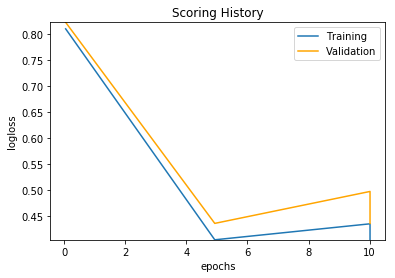

In [16]:
m_def.plot()

# Now let's try a regression: predict ArrDelay

In [17]:
y = 'ArrDelay'
ignoreFields = ['IsArrDelayed', 'ActualElapsedTime', 'ArrTime', 'TailNum']
xWithDep = [i for i in train.names if i not in ignoreFields]

In [19]:
m_DLR_def = H2ODeepLearningEstimator(variable_importances = True)
m_DLR_def.train(xWithDep, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [20]:
m_DLR_def.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 49.80968361942229
RMSE: 7.057597581289421
MAE: 3.436097972294074
RMSLE: NaN
Mean Residual Deviance: 49.80968361942229


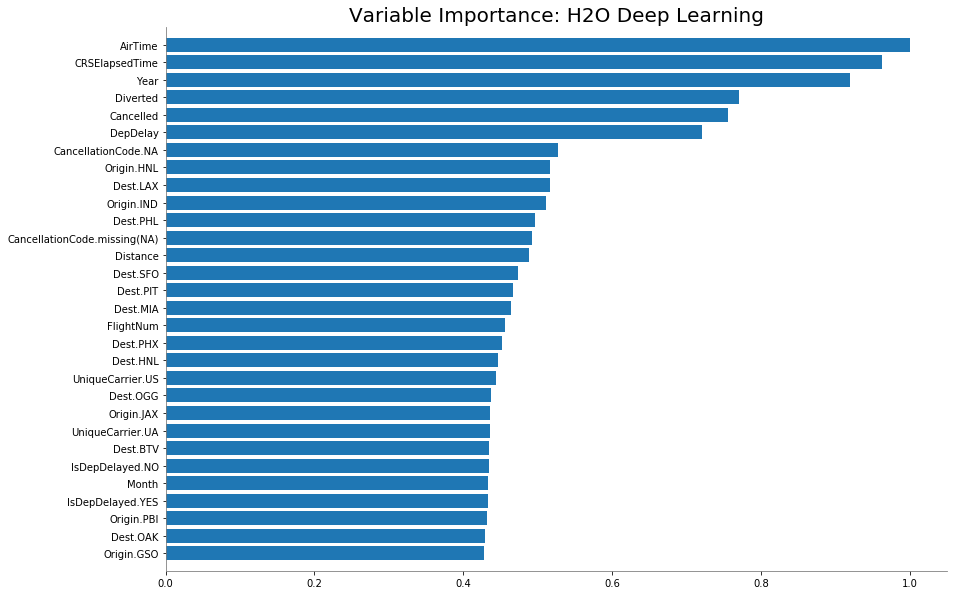

In [21]:
m_DLR_def.varimp_plot(30)

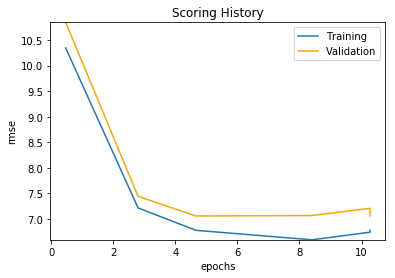

In [23]:
m_DLR_def.plot()

# Grid search on the deep learning parameters

In [12]:
from h2o.grid.grid_search import H2OGridSearch

search_criteria = { 'strategy': 'RandomDiscrete', 'seed':77,'max_models' : 12}

hyper_params={'activation': ["RectifierWithDropout"],

"input_dropout_ratio" : [0,0.05, 0.1],

'l1': [0, 0.00001,0.000001,0.000003],

'l2': [0, 0.00001,0.000001,0.000003],

'input_dropout_ratio' : [0, 0.1, 0.2,0.3],

'hidden_dropout_ratios':[[0, 0], [0.2,0.2],[0.4,0.4],[0.6,0.6 ]]

}

g = H2OGridSearch(model=H2ODeepLearningEstimator(epochs = 40, hidden=[400,200]),

grid_id='grid_test',

hyper_params= hyper_params,

search_criteria =search_criteria

)

x2 = list(filter(lambda v : v != 'TailNum', xAll))

%time g.train(x2, y, train,validation_frame = valid)

deeplearning Grid Build progress: |█████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_aded08df9d52f694701e7ec1420c435b> was cancelled by the user.

In [13]:
x2

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'CRSElapsedTime',
 'AirTime',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted']